In [1]:
#Construcción Redes Neuronales LSTM en Series Temporales
#1 Preprocesamiento de datos

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Paso 1. Preprocesamiento de datos (ejemplo básico)
# Supongamos que tenemos la siguiente serie de tiempo prueba
times_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12, 13, 14, 15])
print("time series", times_series)
train_size = int(len(times_series) * 0.6) #Tamaño del conjunto de entrenamiento
train_data, test_data = times_series[:train_size], times_series[train_size:]
print("train data", train_data)
print("test data", test_data)

time series [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train data [1 2 3 4 5 6 7 8 9]
test data [10 11 12 13 14 15]


In [2]:
# Paso 2: Preparación de datos (ejemplo básico)
# Por ejemplo, transformamos nuestros datos en secuencias
def create_dataset(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)
#Definimos el número de pasos de tiempo para la serie temporal
seq_length = 4
#Creamos las secuencias de entrenamiento y prueba en formato 3D
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

#Imprimimos los conjutos de datos en formato 3D
print("Conjunto de secuencias de entrenamiento X_train:\n", X_train)
print("Etiquetas de entrenamiento y_train:\n", y_train)
print("Conjunto de secuencias de prueba X_test:\n", X_test)
print("Etiquetas de prueba y_test:\n", y_test)

Conjunto de secuencias de entrenamiento X_train:
 [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
Etiquetas de entrenamiento y_train:
 [5 6 7 8 9]
Conjunto de secuencias de prueba X_test:
 [[10 11 12 13]
 [11 12 13 14]]
Etiquetas de prueba y_test:
 [14 15]


In [3]:
#3 Contrucción del modelo
model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.summary()

#4 Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 16)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 45.7225
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 45.3522
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 44.9827
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 44.6136
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 44.2450
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 43.8767
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 43.5087
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 43.1410
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 42.7734
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 42.4058
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 42.0380
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - loss: 41.6700
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 41.3015
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 40.9325
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4

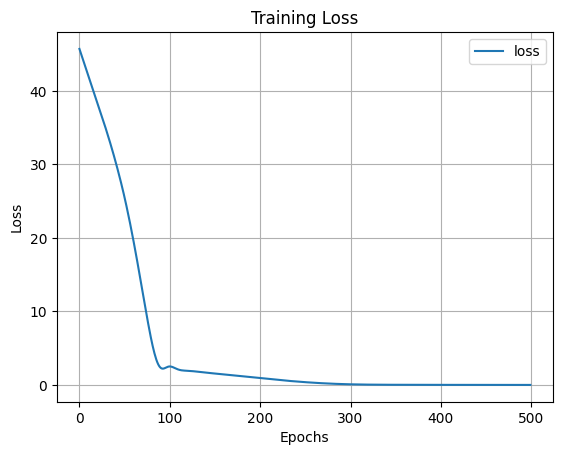

In [ ]:
# Paso 5: Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=500)

# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:
#Paso 6: Evaluación del modelo
Evaluación = model.evaluate(X_test, y_test)
print("Evaluación del modelo:", Evaluación)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 0.6847
Evaluación del modelo: 0.6846833229064941


Predicción del modelo X_test:
 [[10 11 12 13]
 [11 12 13 14]]
Etiquetas reales y_test:
 [14 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Predicciones del modelo:
 [[14.686795]
 [15.947459]]


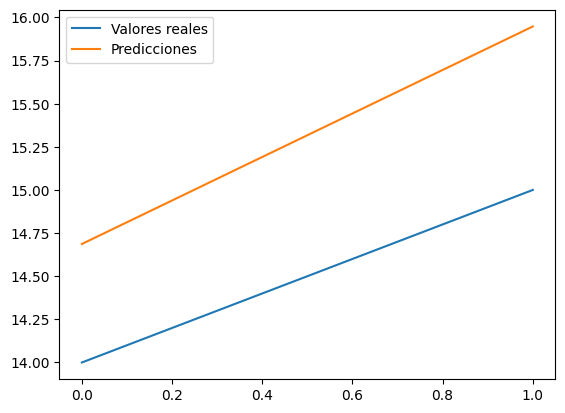

In [ ]:
# Paso 7: Predicción
print("Predicción del modelo X_test:\n", X_test)
print("Etiquetas reales y_test:\n", y_test)
y_pred = model.predict(X_test)
print("Predicciones del modelo:\n", y_pred)
plt.plot(y_test, label='Valores reales')
plt.plot(y_pred, label='Predicciones')
plt.legend()
plt.show()

Promedio de las diferencias: -0.8171272277832031


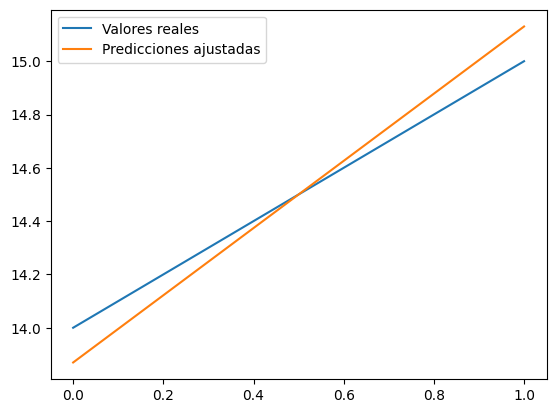

In [ ]:
#Ajustando el pronóstico porque se mantiene la tendencia
# Calcular las diferencias entre y_test y y_pred
differences = y_test - y_pred

# Calcular el promedio de las diferencias
mean_difference = differences.mean()
print("Promedio de las diferencias:", mean_difference)

# Restar el promedio de las diferencias a cada valor en y_pred
y_pred_adjusted = y_pred + mean_difference

# Graficar los valores reales y las predicciones ajustadas
plt.plot(y_test, label='Valores reales')
plt.plot(y_pred_adjusted, label='Predicciones ajustadas')
plt.legend()
plt.show()